# Recommender system RBM 
Author: Petri Lamminaho 
Movie recommender using Tensorflow and RBM neural net 

In [87]:
import tensorflow as tf
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

## Loading data to Pandas 

In [88]:
# movie dataframe 
df_movies = pd.read_csv('ml-1m/movies.dat', sep='::', header=None, engine='python')
#ratings dataframe
df_ratings = pd.read_csv('ml-1m/ratings.dat', sep='::', header=None, engine='python')

In [89]:
df_movies.head()

,0,1,2
0,1,Toy Story (1995),Animation|Children's|Comedy
1,2,Jumanji (1995),Adventure|Children's|Fantasy
2,3,Grumpier Old Men (1995),Comedy|Romance
3,4,Waiting to Exhale (1995),Comedy|Drama
4,5,Father of the Bride Part II (1995),Comedy


In [90]:
df_ratings.head()

,0,1,2,3
0,1,1193,5,978300760
1,1,661,3,978302109
2,1,914,3,978301968
3,1,3408,4,978300275
4,1,2355,5,978824291


## Processing data

In [91]:
# renaiming the dataframes columns 
df_movies.columns = ['MovieID', 'Title', 'Genre']
df_ratings.columns = ['UserID', 'MovieID', 'Rating', 'Timestamp']

In [92]:
df_movies.head()

,MovieID,Title,Genre
0,1,Toy Story (1995),Animation|Children's|Comedy
1,2,Jumanji (1995),Adventure|Children's|Fantasy
2,3,Grumpier Old Men (1995),Comedy|Romance
3,4,Waiting to Exhale (1995),Comedy|Drama
4,5,Father of the Bride Part II (1995),Comedy


In [93]:
df_ratings.head()

,UserID,MovieID,Rating,Timestamp
0,1,1193,5,978300760
1,1,661,3,978302109
2,1,914,3,978301968
3,1,3408,4,978300275
4,1,2355,5,978824291


In [94]:
print('The Number of Movies in Dataset', len(df_movies))

The Number of Movies in Dataset 3883


In [95]:
df_movies['List index'] = df_movies.index
df_movies.head()

,MovieID,Title,Genre,List index
0,1,Toy Story (1995),Animation|Children's|Comedy,0
1,2,Jumanji (1995),Adventure|Children's|Fantasy,1
2,3,Grumpier Old Men (1995),Comedy|Romance,2
3,4,Waiting to Exhale (1995),Comedy|Drama,3
4,5,Father of the Bride Part II (1995),Comedy,4


In [96]:
df_merged = df_movies.merge(df_ratings, on="MovieID")
df_merged.head()

,MovieID,Title,Genre,List index,UserID,Rating,Timestamp
0,1,Toy Story (1995),Animation|Children's|Comedy,0,1,5,978824268
1,1,Toy Story (1995),Animation|Children's|Comedy,0,6,4,978237008
2,1,Toy Story (1995),Animation|Children's|Comedy,0,8,4,978233496
3,1,Toy Story (1995),Animation|Children's|Comedy,0,9,5,978225952
4,1,Toy Story (1995),Animation|Children's|Comedy,0,10,5,978226474


In [97]:
df_merged= df_merged.drop('Timestamp', axis=1).drop('Title', axis=1).drop('Genre', axis=1)
user_group = df_merged.groupby("UserID")
#user_group.head()

## Create training data 

In [98]:
amount_used_users = 1000
training_data = []

In [99]:
for userID, currentUser in user_group:
    temp_rating = [0]*len(df_movies)
    for num, movie in currentUser.iterrows():
        temp_rating[movie['List index']] = movie['Rating']/5.0
    training_data.append(temp_rating)
    if amount_used_users == 0:
        break
    amount_used_users -=1

#training_data    

## Creating model/ neural net 


In [100]:
visible_nodes = len(df_movies)
hidden_nodes = 50 
learning_rate = 1.0 
vb = tf.placeholder(tf.float32, [visible_nodes])  # Number of unique movies visiable bias
hb = tf.placeholder(tf.float32, [hidden_nodes])  # Number of features were going to learn hidden bias 
W = tf.placeholder(tf.float32, [visible_nodes, hidden_nodes])  # Weight Matrix


In [101]:
# layer 1 input 

v0 = tf.placeholder("float", [None, visible_nodes]) # input layer (visiable layer) 
v0_activation =  tf.nn.sigmoid(tf.matmul(v0, W) + hb)
h0 = tf.nn.relu(tf.sign(v0_activation - tf.random_uniform(tf.shape(v0_activation))))  # Gibb's Sampling  


In [102]:
# hidden layer reconstruction 

v1_activation = tf.nn.sigmoid(tf.matmul(h0, tf.transpose(W)) + vb) 
v1 = tf.nn.relu(tf.sign(v1_activation - tf.random_uniform(tf.shape(v1_activation))))
h1 = tf.nn.sigmoid(tf.matmul(v1, W) + hb)


In [103]:
w_pos_grad = tf.matmul(tf.transpose(v0), h0)
w_neg_grad = tf.matmul(tf.transpose(v1), h1)
CD = (w_pos_grad - w_neg_grad) / tf.to_float(tf.shape(v0)[0])

In [104]:
update_w = W + learning_rate * CD
update_vb = vb + learning_rate * tf.reduce_mean(v0 - v1, 0)
update_hb = hb + learning_rate * tf.reduce_mean(h0 - h1, 0)

In [105]:
err = v0 - v1
err_sum = tf.reduce_mean(err*err)

In [106]:
# defines weights and biases 

# Current weight
cur_w = np.zeros([visible_nodes, hidden_nodes], np.float32)
# Previous weight
prv_w = np.zeros([visible_nodes, hidden_nodes], np.float32)

# Current visible unit biases
cur_vb = np.zeros([visible_nodes], np.float32)

# Current hidden unit biases
cur_hb = np.zeros([hidden_nodes], np.float32)

# Previous visible unit biases
prv_vb = np.zeros([visible_nodes], np.float32)

# Previous hidden unit biases
prv_hb = np.zeros([hidden_nodes], np.float32)

In [107]:
# start TF-session 
sess = tf.Session()
sess.run(tf.global_variables_initializer())

## Training the model 

0.14150509
0.093061246
0.07496422
0.06596328
0.060257424
0.05628952
0.0539109
0.051786322
0.04865723
0.046650484
0.04488207
0.04382936
0.04328197
0.043035295
0.042663638
0.04214996
0.041527502
0.041050624
0.04088777
0.040470053


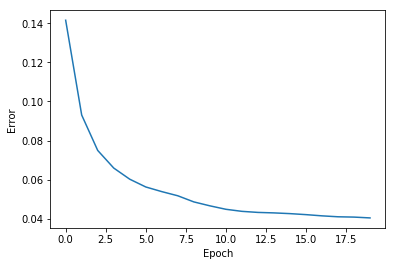

In [108]:
epochs = 20 
batch_size = 120 
errors = []
for i in range(epochs):
    for start, end in zip(range(0, len(training_data), batch_size), range(batch_size, len(training_data), batch_size)):
        batch = training_data[start:end]
        cur_w = sess.run(update_w, feed_dict={v0: batch, W: prv_w, vb: prv_vb, hb: prv_hb})
        cur_vb = sess.run(update_vb, feed_dict={v0: batch, W: prv_w, vb: prv_vb, hb: prv_hb})
        cur_hb = sess.run(update_hb, feed_dict={v0: batch, W: prv_w, vb: prv_vb, hb: prv_hb})
        prv_w = cur_w
        prv_vb = cur_vb
        prv_hb = cur_hb
    errors.append(sess.run(err_sum, feed_dict={v0: training_data, W: cur_w, vb: cur_vb, hb: cur_hb}))
    print(errors[-1])
plt.plot(errors)
plt.ylabel('Error')
plt.xlabel('Epoch')
plt.show()


## Making  recommendations

In [109]:
user_idex = 10 
testUser = [training_data[user_idex]]

In [110]:
hh0 = tf.nn.sigmoid(tf.matmul(v0, W) + hb)
vv1 = tf.nn.sigmoid(tf.matmul(hh0, tf.transpose(W)) + vb)
feed = sess.run(hh0, feed_dict={v0: testUser, W: prv_w, hb: prv_hb})
rec = sess.run(vv1, feed_dict={hh0: feed, W: prv_w, vb: prv_vb})

In [111]:
scored_movies_df = df_movies
scored_movies_df["Recommendation Score"] = rec[0]
print(scored_movies_df.sort_values(["Recommendation Score"], ascending=False).head(20))

      MovieID                                       Title  \
2789     2858                      American Beauty (1999)   
589       593            Silence of the Lambs, The (1991)   
604       608                                Fargo (1996)   
315       318            Shawshank Redemption, The (1994)   
2327     2396                  Shakespeare in Love (1998)   
523       527                     Schindler's List (1993)   
352       356                         Forrest Gump (1994)   
1245     1265                        Groundhog Day (1993)   
1575     1617                    L.A. Confidential (1997)   
293       296                         Pulp Fiction (1994)   
1959     2028                  Saving Private Ryan (1998)   
2928     2997                 Being John Malkovich (1999)   
1656     1704                    Good Will Hunting (1997)   
0           1                            Toy Story (1995)   
1195     1213                           GoodFellas (1990)   
49         50           

In [112]:
print(df_merged.iloc[user_idex]) 

MovieID        1
List index     0
UserID        28
Rating         3
Name: 10, dtype: int64


In [113]:
movies_df_for_user = df_merged[df_merged['UserID'] == 28]
print(movies_df_for_user.head())

       MovieID  List index  UserID  Rating
10           1           0      28       3
12478       25          24      28       3
14421       32          31      28       3
18719       39          38      28       4
21765       47          46      28       2


In [116]:
merged_df_user = scored_movies_df.merge(movies_df_for_user, on='MovieID', how='outer')
merged_df_user = merged_df_user.drop('List index_y', axis=1).drop('UserID', axis=1)
print(merged_df_user.sort_values(['Recommendation Score'], ascending=False).head(10))

      MovieID                             Title  \
2789     2858            American Beauty (1999)   
589       593  Silence of the Lambs, The (1991)   
604       608                      Fargo (1996)   
315       318  Shawshank Redemption, The (1994)   
2327     2396        Shakespeare in Love (1998)   
523       527           Schindler's List (1993)   
352       356               Forrest Gump (1994)   
1245     1265              Groundhog Day (1993)   
1575     1617          L.A. Confidential (1997)   
293       296               Pulp Fiction (1994)   

                                 Genre  List index_x  Recommendation Score  \
2789                      Comedy|Drama          2789              0.764822   
589                     Drama|Thriller           589              0.749988   
604               Crime|Drama|Thriller           604              0.710143   
315                              Drama           315              0.707005   
2327                    Comedy|Romance          